In [1]:
import pandas as pd

# load data into the dataframe
health_data = pd.read_csv(r"C:\Users\COMPUTER\Desktop\Jupyter Projects\Health Data Analysis Project\Health_dataset.csv")

# Display the first few rows

health_data.head()

,Patient ID,Gender,Disease,Treatment,Hospital,Admission Date,Discharge Date,Treatment Status,Cause of Death,Date of Birth
0,PAT-00001,Male,Tuberculosis,Dialysis,City General Hospital,2022-12-19,2023-01-16,Recovered,NaN,1973-06-05
1,PAT-00002,Female,Malaria,Dialysis,City General Hospital,2023-03-29,2023-04-21,Recovered,NaN,1998-11-21
2,PAT-00003,Female,Malaria,Surgery,City General Hospital,2022-09-16,2022-10-15,Recovered,NaN,1942-02-14
3,PAT-00004,Male,Asthma,Dialysis,City General Hospital,2022-02-07,2022-02-11,Recovered,NaN,1943-01-17
4,PAT-00005,Female,Diabetes,Physical Therapy,City General Hospital,2022-10-25,2022-10-30,Recovered,NaN,1979-07-28


In [2]:
## Count the number of patients

total_records = health_data.shape[0]

print("Number of patients is " ,total_records)

Number of patients is  8000


In [3]:
## How is the patient population distributed by gender?

gender_count = health_data['Gender'].value_counts()

print("Gender Distribution")
print(gender_count)

Gender Distribution
Gender
Male      5206
Female    2794
Name: count, dtype: int64


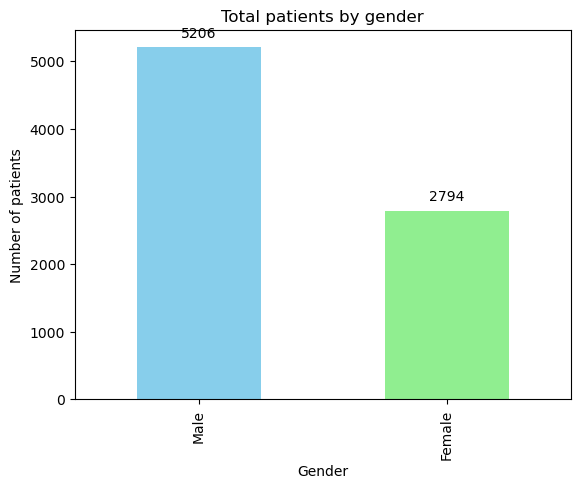

In [4]:
# Visualise gender distribution 

import matplotlib.pyplot as plt
ax=gender_count.plot(kind ='bar', color = ['skyblue', 'lightgreen'])
plt.title("Total patients by gender")
plt.ylabel("Number of patients")


# label part
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(
        int(height),
        xy=(bar.get_x() + bar.get_width()/2, height),
        xytext= (0,5),
        textcoords="offset points",
        ha='center',
        va='bottom'
    )

plt.show()

Age Group
21-40     1646
41-60     1608
81-100    1603
61-80     1580
0-20      1533
Name: count, dtype: int64


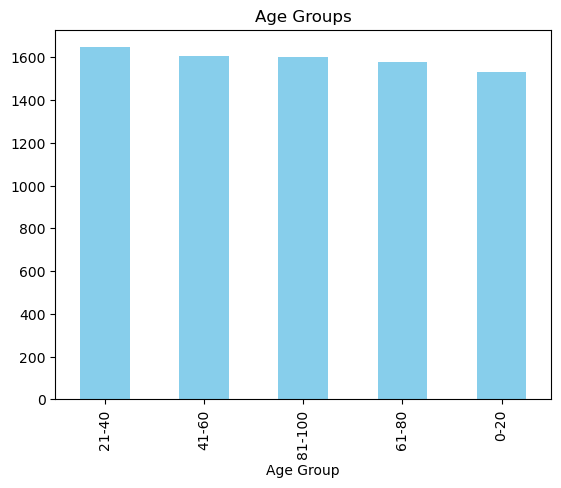

In [5]:
# Patient's age-group by total visits

# Convert the admission date and date of birth to proper date formats

health_data['Admission Date'] = pd.to_datetime(health_data['Admission Date'])
health_data['Date of Birth'] = pd.to_datetime(health_data['Date of Birth'])

#Calculate the patient's age as of time of admission in year
health_data['Age']= (health_data['Admission Date'] - health_data['Date of Birth']).dt.days / 365.25

#With the subtracted age we from admission date and birthdate, we convert age to an interger, the age is not the actual age but the date from the admission to date of birth
health_data['Age'] = health_data['Age'].astype(int)

#We are grouping the age to each age range, child, adult and so on

bins = [0,20,40,60,80,100]

labels = ['0-20', '21-40', '41-60', '61-80', '81-100']

#Create an age group using the bin and labels above

health_data['Age Group'] = pd.cut(health_data['Age'], bins= bins, labels=labels, right=False)

#Count the number of patients in each age group
age_count = health_data['Age Group'].value_counts()

print(age_count)

ax = age_count.plot(kind ='bar', color='skyblue')
plt.title("Age Groups")
plt.show()

Disease
Malaria           1193
Asthma             966
Tuberculosis       864
Diabetes           694
Cancer             691
Typhoid            680
Heart Disease      567
Stroke             493
HIV/AIDS           488
Kidney Failure     475
Pneumonia          246
Liver Disease      244
Hypertension       173
COVID-19           157
Dengue              69
Name: count, dtype: int64


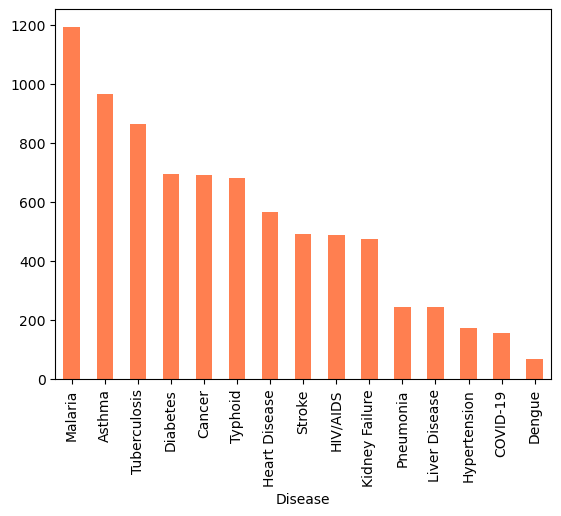

In [6]:
# Which diseases are most commonly diagonised among the patients
disease_count= health_data['Disease'].value_counts()
print(disease_count)

ax = disease_count.plot(kind ='bar', color='coral')



In [7]:
#Get the top 3 most commonly found diseases among the patients
dynamictop = 5
disease_count_top = health_data['Disease'].value_counts().nlargest(dynamictop)
total_topsum = disease_count_top.sum()
format_value = "{:,}".format(total_topsum)
description = f"total count of the {dynamictop} most common diseases"

#the percentage of the number of the top diseases out of each other
percentage = (disease_count_top/total_topsum) *100
roundpercentage = percentage.round(0).astype(int)

for disease, pct in roundpercentage.items():
    print(f"{disease}: {pct}%")

print(description,disease_count_top)
print("Sum of ",description, format_value)
print(roundpercentage)

Malaria: 27%
Asthma: 22%
Tuberculosis: 20%
Diabetes: 16%
Cancer: 16%
total count of the 5 most common diseases Disease
Malaria         1193
Asthma           966
Tuberculosis     864
Diabetes         694
Cancer           691
Name: count, dtype: int64
Sum of  total count of the 5 most common diseases 4,408
Disease
Malaria         27
Asthma          22
Tuberculosis    20
Diabetes        16
Cancer          16
Name: count, dtype: int32


In [8]:
#Are certain diseases more prevalent in one gender compared to the other?
gender_disease = pd.crosstab(health_data['Disease'], health_data['Gender'])
print("Diseases that are common among genders: ")
print(gender_disease)

Diseases that are common among genders: 
Gender          Female  Male
Disease                     
Asthma             320   646
COVID-19            53   104
Cancer             239   452
Dengue              27    42
Diabetes           256   438
HIV/AIDS           155   333
Heart Disease      206   361
Hypertension        65   108
Kidney Failure     182   293
Liver Disease       73   171
Malaria            407   786
Pneumonia           93   153
Stroke             177   316
Tuberculosis       302   562
Typhoid            239   441


In [9]:
# Calculate the percentage of each patient stay and create a group to show the numbers of patients in each group

#Convert date to proper data type
health_data['Admission Date'] = pd.to_datetime(health_data['Admission Date'])
health_data['Discharge Date'] = pd.to_datetime(health_data['Discharge Date'])

health_data['Stay Duration'] = (health_data['Discharge Date'] - health_data['Admission Date']).dt.days
print(health_data[['Admission Date','Discharge Date', 'Stay Duration']].head())

  Admission Date Discharge Date  Stay Duration
0     2022-12-19     2023-01-16             28
1     2023-03-29     2023-04-21             23
2     2022-09-16     2022-10-15             29
3     2022-02-07     2022-02-11              4
4     2022-10-25     2022-10-30              5


### Group Stay Duration


In [10]:
bins = [-1, 0, 3, 7, 14, float('inf')]
print(bins)
labels = ["Same Day", "1-3 Days", "4-7 Days", "8-14 Days", "Above 15 Days"]
health_data['Stay Bucket'] = pd.cut(health_data['Stay Duration'], bins=bins, labels=labels, right=True)
print(health_data['Stay Bucket'])

[-1, 0, 3, 7, 14, inf]
0       Above 15 Days
1       Above 15 Days
2       Above 15 Days
3            4-7 Days
4            4-7 Days
            ...      
7995         4-7 Days
7996    Above 15 Days
7997        8-14 Days
7998    Above 15 Days
7999    Above 15 Days
Name: Stay Bucket, Length: 8000, dtype: category
Categories (5, object): ['Same Day' < '1-3 Days' < '4-7 Days' < '8-14 Days' < 'Above 15 Days']


### Number of patients in each group

In [11]:
total_group_patient = health_data['Stay Bucket'].value_counts()
print(total_group_patient)


Stay Bucket
Above 15 Days    4269
8-14 Days        1837
4-7 Days         1087
1-3 Days          807
Same Day            0
Name: count, dtype: int64


### Create chart to visualize it

Text(0.5, 1.0, 'Total Patients by length of stay')

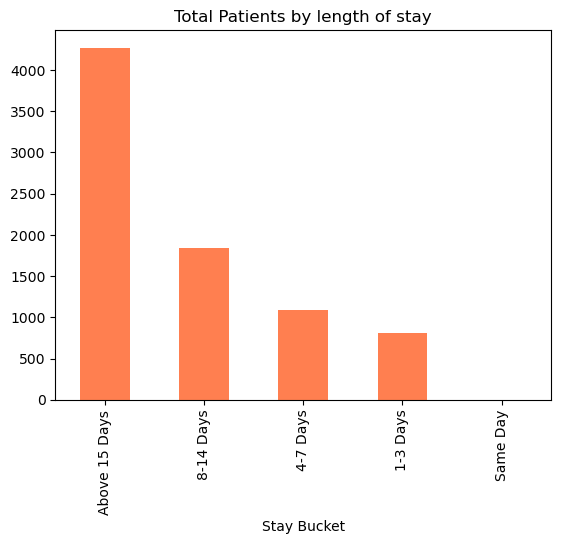

In [12]:
total_group_patient.plot(kind ='bar', color='coral')
plt.title("Total Patients by length of stay")

### For any records with a recorded course of death, analyze pattern to identify risk factor

In [13]:
#filter records where the cause of death is not empty
death_cause = health_data.dropna(subset='Cause of Death')

count_death= death_cause['Cause of Death'].value_counts()
print("Most common cause of death")
print(count_death)

Most common cause of death
Cause of Death
Multiple Organ Failure    114
Respiratory Failure       109
Cardiac Arrest            102
Septic Shock               94
Name: count, dtype: int64


### Visualize as chart

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Multiple Organ Failure'),
  Text(1, 0, 'Respiratory Failure'),
  Text(2, 0, 'Cardiac Arrest'),
  Text(3, 0, 'Septic Shock')])

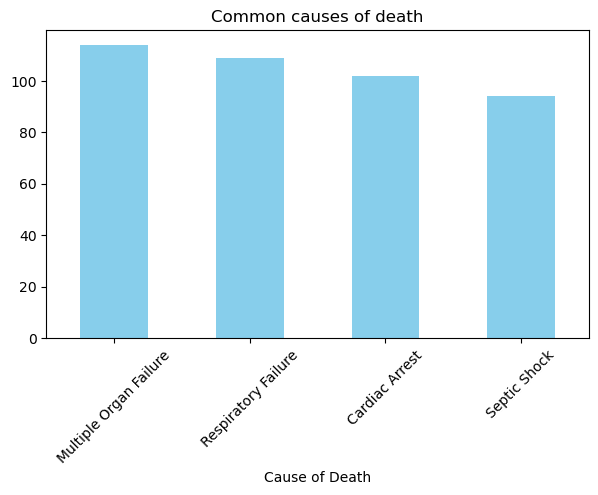

In [14]:
plt.figure(figsize = (7,4))
plt.title("Common causes of death")
count_death.plot(kind ='bar', color='skyblue')
plt.xticks(rotation =45)

# What are the percentage of the following patients: Deceased, under-treatment and recoverd patients

In [15]:
#Total patients

total_patients = health_data.shape[0]
print("Total number of patients: " , total_patients)

Total number of patients:  8000


In [16]:
#Total death patients
total_deaths = (health_data['Treatment Status'].str.lower() =='deceased').sum()
print("Total number of deceased patients :" ,total_deaths)

Total number of deceased patients : 419


In [17]:
#percentage of deceased
death_rate = (total_deaths / total_patients) *100 if total_patients>0 else 0 

print("Percentage of deceased is :" , death_rate)

Percentage of deceased is : 5.2375


## Recovered Patients

In [18]:
#Total recovered patients
total_recovered = (health_data['Treatment Status'].str.lower() =='recovered').sum()
print("Total number of recovered patients :" ,total_recovered)

recovered_rate = (total_recovered / total_patients) *100 if total_patients>0 else 0
print("Percentage of recovered patients is :" , recovered_rate)

Total number of recovered patients : 6819
Percentage of recovered patients is : 85.2375


## Under Treatment

In [19]:
# All patients under treatment
under_treatment_rate = 100 - (recovered_rate + death_rate)
print("The rate of patients under treatment is :", under_treatment_rate)

The rate of patients under treatment is : 9.525000000000006


### Showing this as doughnut chart

In [20]:
print(f"Total recovery rate:" ,recovered_rate)
print(f"Total death rate:" ,death_rate)
print(f"Total under treatment rate:", under_treatment_rate)

Total recovery rate: 85.2375
Total death rate: 5.2375
Total under treatment rate: 9.525000000000006


Text(0.5, 1.0, 'Patient Treatment Status')

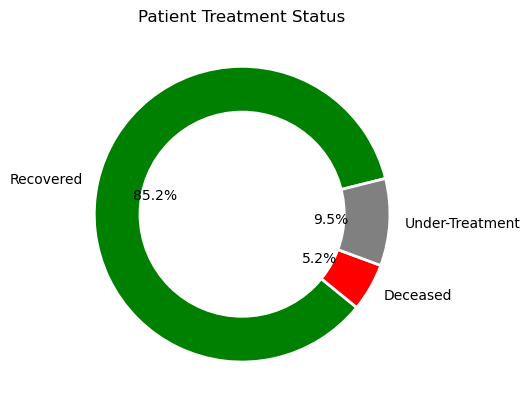

In [21]:
labels = ['Recovered', 'Deceased','Under-Treatment']
sizes =[recovered_rate, death_rate, under_treatment_rate]
colors = ['green', 'red', 'gray']

plt.Figure(figsize=(8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', 
        colors=colors, startangle=14, wedgeprops={'edgecolor':'white', 'linewidth':2})
plt.gca().add_artist(plt.Circle((0,0), 0.70, fc='white'))
plt.title("Patient Treatment Status")

## What are the peak days of the week on a monthly bases for admissions and discharges

In [22]:
import seaborn as sns

<Axes: title={'center': 'Total Patients by Week Visits'}, xlabel='Admission Month', ylabel='Admission Day'>

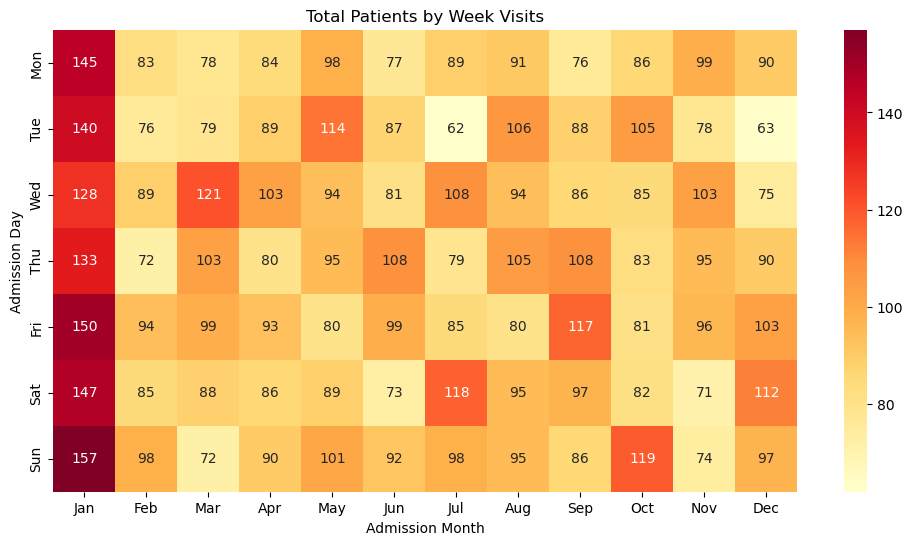

In [23]:
#Extract the short day and month name

# Convert to datetime with explicit format
# Note: Replace 'YYYY-MM-DD' with your actual date format, e.g., '%Y-%m-%d' for 2023-01-31
# Common formats: '%Y-%m-%d', '%m/%d/%Y', '%d-%b-%Y', etc.
health_data['Admission Date'] = pd.to_datetime(health_data['Admission Date'],  # Replace with your actual format
                                              errors="coerce")

# Create a new column for the day before modifying the date column
health_data['Admission Day'] = health_data['Admission Date'].dt.strftime('%a')

# Now modify the date column to contain only month
health_data['Admission Month'] = health_data['Admission Date'].dt.strftime('%b')

# Define proper order for month and abbreviated days
# Corrected month abbreviations to match standard datetime abbreviations
month_order = [
    'Jan','Feb', 'Mar', 'Apr','May', 'Jun',  # Changed 'June' to 'Jun'
    'Jul', 'Aug', 'Sep','Oct','Nov','Dec'    # Changed 'July' to 'Jul'
]

day_order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

# Create pivot table with correct column names
admission_heatmap = health_data.pivot_table(
    index= 'Admission Day',     
    columns='Admission Month',  
    aggfunc='size',
    fill_value=0  
)

# Convert all values to integers - use fillna first to handle any NaN values
admission_heatmap = admission_heatmap.fillna(0).astype(int)

# Correct re order of heatmap data
admission_heatmap_sorted = admission_heatmap.reindex(index=day_order, columns=month_order)

# Fill any NaN values that might have been introduced by reindexing
admission_heatmap_sorted = admission_heatmap_sorted.fillna(0).astype(int)

# Explicitly display the pivot table
admission_heatmap_sorted

#plot heatmap
plt.figure(figsize=(12,6))
plt.title("Total Patients by Week Visits")
sns.heatmap(admission_heatmap_sorted, annot=True, fmt="d", cmap="YlOrRd")

# What is the total number of patients admitted per week month and year? 

## Filter month by year

In [24]:
# Group data by the day name and count admission
admission_by_day = health_data.groupby('Admission Day').size()
admission_by_day

Admission Day
Fri    1177
Mon    1096
Sat    1143
Sun    1179
Thu    1151
Tue    1087
Wed    1167
dtype: int64

In [25]:
# Sort the name of day
admission_by_day = admission_by_day.reindex(day_order, fill_value=0)
admission_by_day

Admission Day
Mon    1096
Tue    1087
Wed    1167
Thu    1151
Fri    1177
Sat    1143
Sun    1179
dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Mon'),
  Text(1, 0, 'Tue'),
  Text(2, 0, 'Wed'),
  Text(3, 0, 'Thu'),
  Text(4, 0, 'Fri'),
  Text(5, 0, 'Sat'),
  Text(6, 0, 'Sun')])

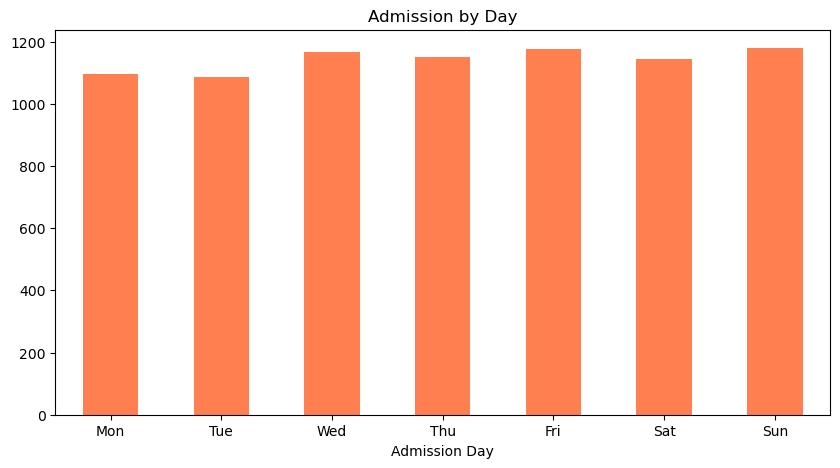

In [26]:
#Create a visual

admission_by_day.plot(kind ='bar', color='coral', figsize=(10,5))
plt.title("Admission by Day")
plt.xticks(rotation=0)

In [27]:
#Top 3 days with the highest admission
top3_admission = health_data['Admission Day'].value_counts().nlargest(3)
top3_admission

Admission Day
Sun    1179
Fri    1177
Wed    1167
Name: count, dtype: int64

In [28]:
#bottom 3 days with the highest admission
bottom3_admission = health_data['Admission Day'].value_counts().nsmallest(3)
bottom3_admission

Admission Day
Tue    1087
Mon    1096
Sat    1143
Name: count, dtype: int64

## Total Admission by month filtered by year

In [29]:
# filter using the year of admission

selected_year = 2023
health_data_year = health_data[health_data['Admission Date'].dt.year == selected_year].copy()
health_data_year

,Patient ID,Gender,Disease,Treatment,Hospital,Admission Date,Discharge Date,Treatment Status,Cause of Death,Date of Birth,Age,Age Group,Stay Duration,Stay Bucket,Admission Day,Admission Month
1,PAT-00002,Female,Malaria,Dialysis,City General Hospital,2023-03-29,2023-04-21,Recovered,NaN,1998-11-21,24,21-40,23,Above 15 Days,Wed,Mar
8,PAT-00009,Female,Cancer,Dialysis,City General Hospital,2023-07-21,2023-08-07,Recovered,NaN,1976-02-01,47,41-60,17,Above 15 Days,Fri,Jul
9,PAT-00010,Female,Malaria,Dialysis,City General Hospital,2023-12-25,2024-01-05,Recovered,NaN,2009-01-27,14,0-20,11,8-14 Days,Mon,Dec
10,PAT-00011,Male,Asthma,Surgery,City General Hospital,2023-01-15,2023-02-05,Recovered,NaN,1927-01-24,95,81-100,21,Above 15 Days,Sun,Jan
14,PAT-00015,Male,Cancer,Physical Therapy,City General Hospital,2023-07-01,2023-07-19,Recovered,NaN,1989-12-06,33,21-40,18,Above 15 Days,Sat,Jul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7987,PAT-07988,Female,Typhoid,Surgery,Sunrise Clinic,2023-02-01,2023-03-01,Recovered,NaN,1988-10-15,34,21-40,28,Above 15 Days,Wed,Feb
7992,PAT-07993,Male,Heart Disease,Surgery,Sunrise Clinic,2023-07-16,2023-08-08,Deceased,Multiple Organ Failure,1958-05-01,65,61-80,23,Above 15 Days,Sun,Jul
7994,PAT-07995,Female,Stroke,Chemotherapy,Sunrise Clinic,2023-04-28,2023-05-04,Recovered,NaN,2019-05-28,3,0-20,6,4-7 Days,Fri,Apr
7998,PAT-07999,Male,Typhoid,Ventilation Support,Sunrise Clinic,2023-08-04,2023-08-25,Recovered,NaN,1999-02-01,24,21-40,21,Above 15 Days,Fri,Aug


In [30]:
# Adding the month column
health_data_year['Admission Month'] = health_data_year['Admission Date'].dt.month
health_data_year

# Month name 
health_data_year['Month Name'] = health_data_year['Admission Date'].dt.month_name()
health_data_year

#Total admission on a monthly basis

monthly_admission =(
    health_data_year
    .groupby(['Admission Month', 'Month Name'])
    .size()
    .reset_index(name='Total Patients')
    .sort_values('Admission Month')       
)
monthly_admission

,Admission Month,Month Name,Total Patients
0,1,January,318
1,2,February,293
2,3,March,327
3,4,April,298
4,5,May,322
5,6,June,302
6,7,July,312
7,8,August,337
8,9,September,347
9,10,October,330


### Create a line chart to visualize it

Text(0.5, 1.0, 'Admission of Patients Monthly')

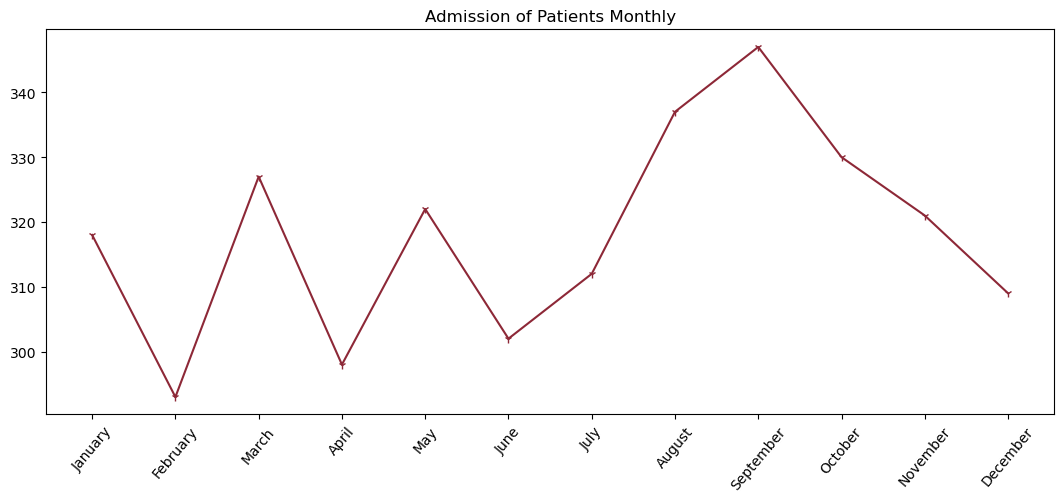

In [31]:
# creating the chart

plt.figure(figsize=(13,5))
plt.plot(monthly_admission['Month Name'], monthly_admission['Total Patients'],
         marker ='1', linestyle = '-', color ='#8D2837')
plt.xticks(rotation=50)
plt.title("Admission of Patients Monthly")

In [32]:
# Export the updated health_data to a CSV file
health_data.to_csv('updated_health_data.csv', index=False)

# If you want to export the heatmap data instead, use:
# admission_heatmap_sorted.to_csv('admission_heatmap.csv')

print("Data exported successfully to 'updated_health_data.csv'")

Data exported successfully to 'updated_health_data.csv'
